In [314]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, cross_validate

In [354]:
data = pd.read_csv('synthetic_data/medical_cost.csv')

In [356]:
data

,Id,age,gender,bmi,children,smoker,region,cost
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1334,50,male,30.970,3,no,northwest,10600.54830
1334,1335,18,female,31.920,0,no,northeast,2205.98080
1335,1336,18,female,36.850,0,no,southeast,1629.83350
1336,1337,21,female,25.800,0,no,southwest,2007.94500


In [318]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   gender    1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   cost      1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [320]:
# Não precisamos da coluna ID
data = data.drop(columns=['Id'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   cost      1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [322]:
# Não temos dados zerados e usaremos todas colunas. 
data.describe()

,age,bmi,children,cost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [324]:
# Porém, gender, smoker e region precisam ser transformados em dados numéricos

In [326]:
label = preprocessing.LabelEncoder()
data['gender'] = label.fit_transform(data['gender'])
data['gender'].unique()

array([0, 1])

In [328]:
label = preprocessing.LabelEncoder()
data['smoker'] = label.fit_transform(data['smoker'])
data['smoker'].unique()

array([1, 0])

In [330]:
label = preprocessing.LabelEncoder()
data['region'] = label.fit_transform(data['region'])
data['region'].unique()

array([3, 2, 1, 0])

In [332]:
data.describe()

,age,gender,bmi,children,smoker,region,cost
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [334]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   cost      1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [336]:
y = data['cost']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: cost, Length: 1338, dtype: float64

In [338]:
x = data[['age', 'gender', 'bmi', 'children', 'smoker', 'region']]
x

,age,gender,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'cost'}>, <Axes: >, <Axes: >]],
      dtype=object)

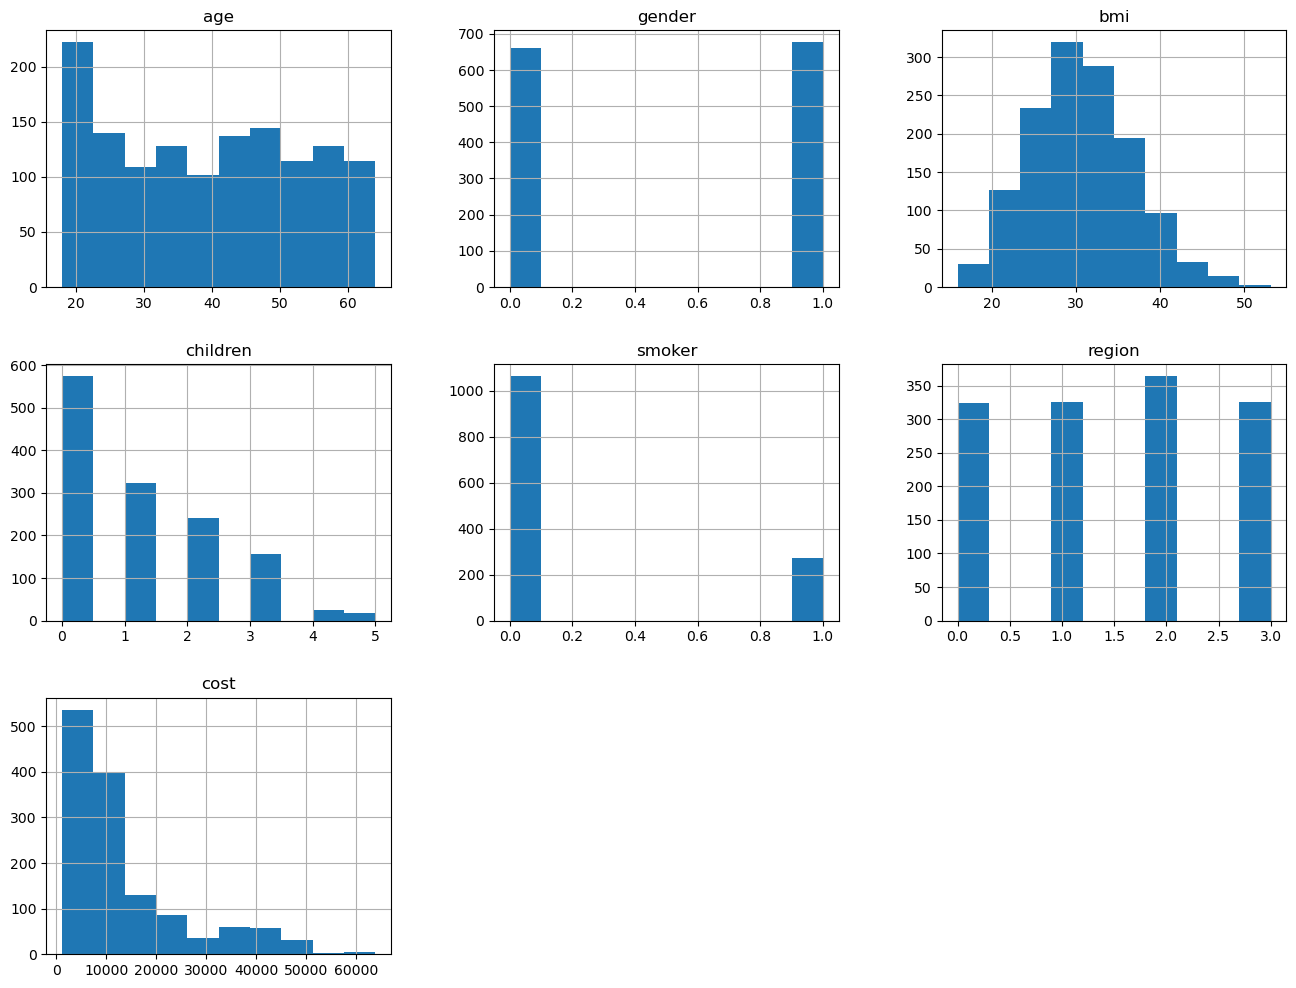

In [340]:
data.hist(figsize = (16, 12))

In [342]:
# Os dados estão bem distribuídos. 
# Gênero está equivalente entre masculino e feminino
# A amostra por região está bem parecida.
# Existe um número maior de pessoas não fumantes do que fumantes.
# O BMI, indicador de massa corporal, está bem distribuído com a maior parte dos indivíduos entre 25 e 35. 
# A média de crianças é 1,2
# A maioria dos custos está entre ~1200 e 20000

In [344]:
def make_regression_model(estimator, X, y, test_size=0.5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    estimator.fit(X_train, y_train)

    return ({ estimator: estimator, 'train': estimator.score(X_train, y_train), 'test': estimator.score(X_test, y_test) })

In [346]:
def return_regression_model(estimator, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    estimator.fit(X_train, y_train)

    return (estimator, X_train, X_test, y_train, y_test)

In [348]:
def make_and_test_model(model, X, Y, plot=False):
    estimator, X_train, X_test, y_train, y_test = return_regression_model(model, X, Y)
    y_pred = estimator.predict(X_test)
    print("Training set score: {:.2f}".format(estimator.score(X_train, y_train)))
    print("Test set score: {:.2f}".format(estimator.score(X_test, y_test)))
    scores = cross_val_score(estimator, X_train, y_train)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("Actual: %0.2f, Predicted: %0.2f" % (y_test.sum(), y_pred.sum()))
    rmse_test = (mean_squared_error(y_test, y_pred))**(1/2)

    # Print rmse_test
    print('Test set RMSE: {:.2f}'.format(rmse_test))
    
    if plot:
        plot_model(y_test, y_pred)
    
    return (estimator, X_train, X_test, y_train, y_test, y_pred)

In [350]:

models = [LinearRegression(), RandomForestRegressor(), BaggingRegressor()]

for model in models:
    print(model)
    make_and_test_model(model, x, y)
    print('\n')

LinearRegression()
Training set score: 0.75
Test set score: 0.74
Accuracy: 0.75 (+/- 0.06)
Actual: 9092184.55, Predicted: 8914112.87
Test set RMSE: 6342.79


RandomForestRegressor()
Training set score: 0.98
Test set score: 0.84
Accuracy: 0.81 (+/- 0.08)
Actual: 8692088.73, Predicted: 9008895.25
Test set RMSE: 4905.75


BaggingRegressor()
Training set score: 0.97
Test set score: 0.81
Accuracy: 0.83 (+/- 0.13)
Actual: 9150741.41, Predicted: 9238469.35
Test set RMSE: 5484.63




In [352]:
estimator, X_train, X_test, y_train, y_test, y_pred = make_and_test_model(RandomForestRegressor(), x, y)

Training set score: 0.98
Test set score: 0.82
Accuracy: 0.84 (+/- 0.04)
Actual: 8782226.18, Predicted: 8960382.80
Test set RMSE: 5043.79


In [288]:
# Apesar de uma pequena diferença entre os testes, o RandomForestRegressor parece ter uma maior acurácia e menor probabilidade de erros.